# <font color = "green">1. Connect Drive</font>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# đường dẫn thư mục sẽ làm việc
WorkingPath ="/content/drive/MyDrive/TAI_LIEU_CUA_THAM/Trợ giảng_DataMining/chương 4/"
%cd $WorkingPath

%pwd

/content/drive/MyDrive/TAI_LIEU_CUA_THAM/Trợ giảng_DataMining/chương 4


'/content/drive/MyDrive/TAI_LIEU_CUA_THAM/Trợ giảng_DataMining/chương 4'

# <font color = "green">2. Import Libraries</font>

In [80]:
import pandas as pd
import numpy as np

# <font color = "green">3. Data</font>

In [81]:
data = pd.read_excel(WorkingPath + 'data.xlsx', header=None)
data

,0,1,2,3,4,5
0,Wine,Chips,Bread,Butter,Milk,Apple
1,Wine,NaN,Bread,Butter,Milk,NaN
2,NaN,NaN,Bread,Butter,Milk,NaN
3,NaN,Chips,NaN,NaN,NaN,Apple
4,Wine,Chips,Bread,Butter,Milk,Apple
5,Wine,Chips,NaN,NaN,Milk,NaN
6,Wine,Chips,Bread,Butter,NaN,Apple
7,Wine,Chips,NaN,NaN,Milk,NaN
8,Wine,NaN,Bread,NaN,NaN,Apple
9,Wine,NaN,Bread,Butter,Milk,NaN


# <font color = "green">4. Thuật toán Apriori sử dụng thư viện</font>

tham khảo https://www.section.io/engineering-education/apriori-algorithm-in-python/

In [82]:
from apyori import apriori

In [83]:
# Chuyển DataFrame thành dạng danh sách (list)
records = []
for i in range(0, 22):
  records.append([str(data.values[i, j]) for j in range(0, 6)])

In [84]:
records

[['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'nan', 'Bread', 'Butter', 'Milk', 'nan'],
 ['nan', 'nan', 'Bread', 'Butter', 'Milk', 'nan'],
 ['nan', 'Chips', 'nan', 'nan', 'nan', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'nan', 'nan', 'Milk', 'nan'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'nan', 'Apple'],
 ['Wine', 'Chips', 'nan', 'nan', 'Milk', 'nan'],
 ['Wine', 'nan', 'Bread', 'nan', 'nan', 'Apple'],
 ['Wine', 'nan', 'Bread', 'Butter', 'Milk', 'nan'],
 ['nan', 'Chips', 'Bread', 'Butter', 'nan', 'Apple'],
 ['Wine', 'nan', 'nan', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'nan'],
 ['Wine', 'nan', 'Bread', 'nan', 'Milk', 'Apple'],
 ['Wine', 'nan', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['nan', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['nan', 'Chips', 'nan', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple

tham khảo https://analyticsindiamag.com/beginners-guide-to-understanding-apriori-algorithm-with-implementation-in-python/

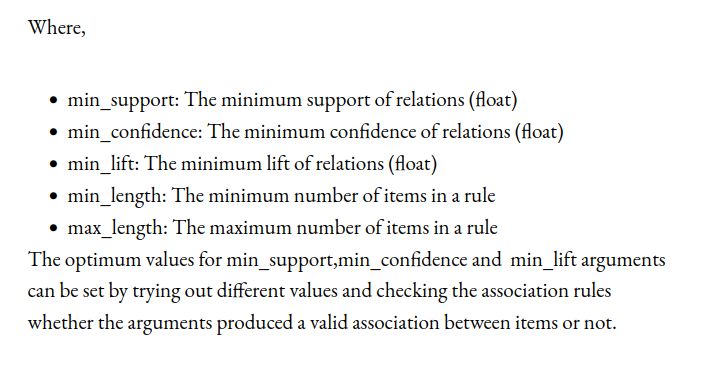

In [85]:
# Xây dựng mô hình Apriori
association_rules = apriori(records, min_support=0.50, min_confidence=0.7, min_lift=1.2, min_length=2)
association_results = list(association_rules)

In [86]:
association_results

[RelationRecord(items=frozenset({'Butter', 'Milk', 'Bread'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Butter'}), items_add=frozenset({'Milk', 'Bread'}), confidence=0.7333333333333334, lift=1.241025641025641), OrderedStatistic(items_base=frozenset({'Milk', 'Bread'}), items_add=frozenset({'Butter'}), confidence=0.8461538461538461, lift=1.241025641025641)])]

In [87]:
def inspect(output):
  lhs = [tuple(result[2][0][0])[0] for result in output]
  rhs = [tuple(result[2][0][1])[0] for result in output]
  support = [result[1] for result in output]
  confidence = [result[2][0][2] for result in output]
  lift = [result[2][0][3] for result in output]
  return list(zip(lhs, rhs, support, confidence, lift))

In [88]:
inspect(association_results)

[('Butter', 'Milk', 0.5, 0.7333333333333334, 1.241025641025641)]

In [89]:
output_DataFrame = pd.DataFrame(inspect(association_results), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_DataFrame

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,Butter,Milk,0.5,0.733333,1.241026


# <font color = "green">5. Thuật toán Apriori tự code</font>

tham khảo https://www.kaggle.com/code/bismakhan08/apriori-algorithm-from-scratch/notebook

In [59]:
import math

In [66]:
transaction_df = pd.read_csv(WorkingPath + 'GroceryStoreDataSet.csv')
transaction_df

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [67]:
transaction_df.index.rename('TID', inplace=True)
transaction_df.rename(columns={'MILK,BREAD,BISCUIT' : 'item_list'}, inplace=True)

In [68]:
trans_df = transaction_df.item_list.str.split(',')
trans_df

TID
0      [BREAD, MILK, BISCUIT, CORNFLAKES]
1                 [BREAD, TEA, BOURNVITA]
2               [JAM, MAGGI, BREAD, MILK]
3                   [MAGGI, TEA, BISCUIT]
4                 [BREAD, TEA, BOURNVITA]
5                [MAGGI, TEA, CORNFLAKES]
6            [MAGGI, BREAD, TEA, BISCUIT]
7                [JAM, MAGGI, BREAD, TEA]
8                           [BREAD, MILK]
9     [COFFEE, COCK, BISCUIT, CORNFLAKES]
10    [COFFEE, COCK, BISCUIT, CORNFLAKES]
11             [COFFEE, SUGER, BOURNVITA]
12                  [BREAD, COFFEE, COCK]
13                [BREAD, SUGER, BISCUIT]
14            [COFFEE, SUGER, CORNFLAKES]
15              [BREAD, SUGER, BOURNVITA]
16                 [BREAD, COFFEE, SUGER]
17                 [BREAD, COFFEE, SUGER]
18        [TEA, MILK, COFFEE, CORNFLAKES]
Name: item_list, dtype: object

In [69]:
def prune(data,supp):
    
    df = data[data.supp_count >= supp] 
    return df
    
def count_itemset(transaction_df, itemsets):
    
    count_item = {}
    for item_set in itemsets:
        set_A = set(item_set)
        for row in trans_df:
            set_B = set(row)
        
            if set_B.intersection(set_A) == set_A: 
                if item_set in count_item.keys():
                    count_item[item_set] += 1
                
                else:
                    count_item[item_set] = 1
                
    data = pd.DataFrame()
    data['item_sets'] = count_item.keys()
    data['supp_count'] = count_item.values()
    
    return data

def count_item(trans_items):
    
    count_ind_item = {}
    for row in trans_items:
        for i in range(len(row)):
            if row[i] in count_ind_item.keys():
                count_ind_item[row[i]] += 1
            else:
                count_ind_item[row[i]] = 1
    
    data = pd.DataFrame()
    data['item_sets'] = count_ind_item.keys()
    data['supp_count'] = count_ind_item.values()
    data = data.sort_values('item_sets')
    return data


def join(list_of_items):
    itemsets = []
    i = 1
    for entry in list_of_items:
        proceding_items = list_of_items[i:]
        for item in proceding_items:
            if(type(item) is str):
                if entry != item:
                    tuples = (entry, item)
                    itemsets.append(tuples)
            else:
                if entry[0:-1] == item[0:-1]:
                    tuples = entry+item[1:]
                    itemsets.append(tuples)
        i = i+1
    if(len(itemsets) == 0):
        return None
    return itemsets

In [70]:
def apriori(trans_data,supp=3, con=0.5):
    freq = pd.DataFrame()
    
    df = count_item(trans_data)
   
    while(len(df) != 0):
        
        df = prune(df, supp)
    
        if len(df) > 1 or (len(df) == 1 and int(df.supp_count >= supp)):
            freq = df
        
        itemsets = join(df.item_sets)
    
        if(itemsets is None):
            return freq
    
        df = count_itemset(trans_data, itemsets)
    return df

In [72]:
freq_item_sets = apriori(trans_df, 4)
freq_item_sets

,item_sets,supp_count
15,"(BREAD, SUGER)",4
16,"(BREAD, TEA)",4
17,"(COFFEE, CORNFLAKES)",4
19,"(COFFEE, SUGER)",4
26,"(MAGGI, TEA)",4


In [73]:
def calculate_conf(value1, value2):
    return round(int(value1)/int(value2) * 100, 2)

In [74]:
def strong_rules(freq_item_sets, threshold):

    confidences = {}
    for row in freq_item_sets.item_sets:
        for i in range(len(row)):
            for j in range(len(row)):
                 if i != j:
                    tuples = (row[i], row[j])
                    conf = calculate_conf(freq_item_sets[freq_item_sets.item_sets == row].supp_count, count_item(trans_df)[count_item(trans_df).item_sets == row[i]].supp_count)
                    confidences[tuples] = conf

        
    conf_df = pd.DataFrame()
    conf_df['item_set'] = confidences.keys()
    conf_df['confidence'] = confidences.values()

    return conf_df[conf_df.confidence >= threshold]


In [75]:
strong_rules(freq_item_sets, 50.0)

,item_set,confidence
1,"(SUGER, BREAD)",66.67
3,"(TEA, BREAD)",57.14
4,"(COFFEE, CORNFLAKES)",50.00
5,"(CORNFLAKES, COFFEE)",66.67
6,"(COFFEE, SUGER)",50.00
7,"(SUGER, COFFEE)",66.67
8,"(MAGGI, TEA)",80.00
9,"(TEA, MAGGI)",57.14


In [76]:
from functools import reduce # Valid in Python 2.6+, required in Python 3
import operator

def interesting_rules(freq_item_sets):
    
    lifts = {}
    prob_of_items = []
  
    for row in freq_item_sets.item_sets:
        num_of_items = len(row)
        
        prob_all = freq_item_sets[freq_item_sets.item_sets == row].supp_count / 18
        for i in range(num_of_items):
            prob_of_items.append(count_item(trans_df)[count_item(trans_df).item_sets == row[i]].supp_count / 18)
        
        lifts[row] = round(float(prob_all / reduce(operator.mul, (np.array(prob_of_items)), 1)), 2)
        
        prob_of_items = []
        
    
    lifts_df = pd.DataFrame()
    lifts_df['Rules'] = lifts.keys()
    lifts_df['lift'] = lifts.values()
    
    return lifts_df

In [77]:
int_rules = interesting_rules(freq_item_sets)
int_rules

,Rules,lift
0,"(BREAD, SUGER)",1.00
1,"(BREAD, TEA)",0.86
2,"(COFFEE, CORNFLAKES)",1.50
3,"(COFFEE, SUGER)",1.50
4,"(MAGGI, TEA)",2.06
